In [23]:
# Importing required libraries - Run this cell FIRST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score

# IMPORTING VARIOUS CLASSIFIERS - just run this cell
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
# import xgboost as xgb

def displayResults (y_test, predictions, n=10):
    Results = pd.DataFrame({'Actual': y_test})
    column = pd.DataFrame({'Predictions': predictions})
    Results = Results.join(column.set_index(Results.index))
    return Results.head(n)

def display_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Lost','Survived']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [24]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)


In [25]:
len(faces.target)

1348

In [26]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [27]:
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)
(1348,)


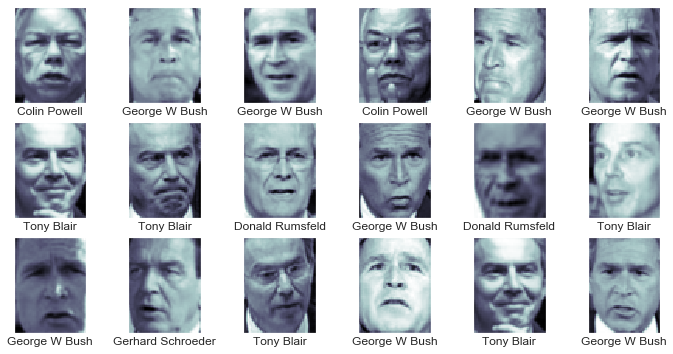

In [28]:
fig, ax = plt.subplots(3, 6,figsize=(12,6))
for i, axi in enumerate(ax.flat):
    imgindx=np.random.randint(1,1348,1)[0]
    i=imgindx
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

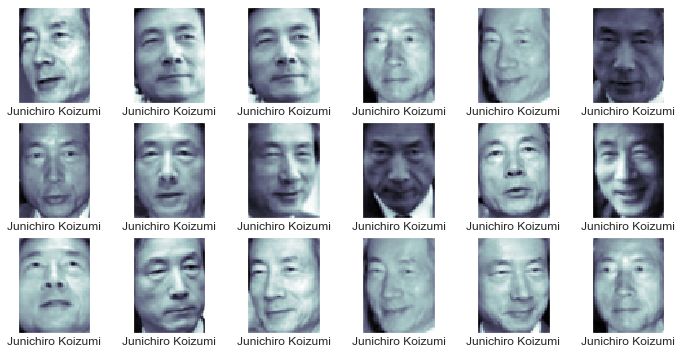

In [32]:
# show sample images of one target
person=6

pdata=faces.data[faces.target==person]
maxlen = len(faces.target[faces.target==person])
piclabel = faces.target_names[person]
fig, ax = plt.subplots(3, 6,figsize=(12,6))
for i, axi in enumerate(ax.flat):
    imgindx=np.random.randint(1,maxlen,1)[0]
    i=imgindx
    axi.imshow(pdata[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=piclabel)

In [33]:
from sklearn.svm import SVC
# from sklearn.decomposition import RandomizedPCA, PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#pca = RandomizedPCA(n_components=150, whiten=True, random_state=42) #PCA(svd_solver='randomized') 
svc = SVC(C=10, kernel='rbf',gamma=0.0001, class_weight=None)
model = make_pipeline(scaler, svc)


In [34]:
svc

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [37]:
Xtest.shape

(337, 2914)

In [38]:
# %%time
#model = grid.best_estimator_
model.fit(Xtrain,ytrain)
yfit = model.predict(Xtest)

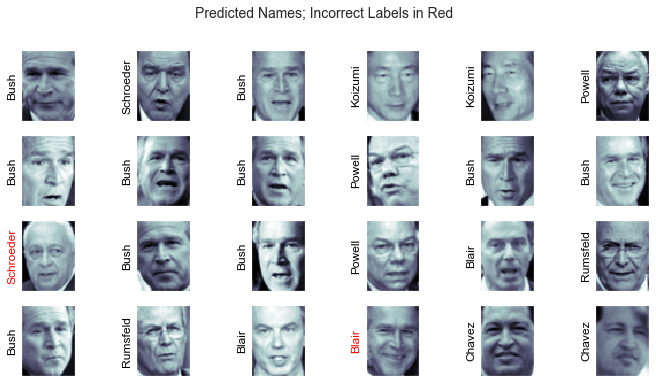

In [39]:
fig, ax = plt.subplots(4, 6, figsize=(12,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.67      0.69        15
     Colin Powell       0.85      0.91      0.88        68
  Donald Rumsfeld       0.82      0.74      0.78        31
    George W Bush       0.89      0.89      0.89       126
Gerhard Schroeder       0.79      0.83      0.81        23
      Hugo Chavez       0.92      0.60      0.73        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.80      0.86      0.83        42

         accuracy                           0.85       337
        macro avg       0.83      0.81      0.82       337
     weighted avg       0.85      0.85      0.85       337



In [41]:
sns.set()

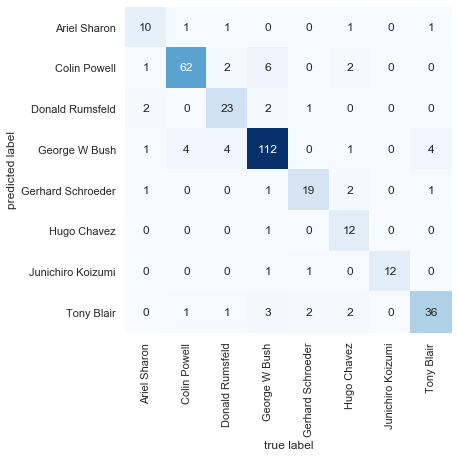

In [42]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,6))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
